# IMPORTING LIBRARIES




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_lokasyon = pd.read_csv("/content/drive/MyDrive/new_csv.csv")

In [ ]:
replaceDict={'Ý':'İ','Ð':'Ğ','Þ':'Ş','þ':'ş','ý':'ı','ð':'ğ'}

for x in replaceDict:
    df_lokasyon=df_lokasyon.replace(x,replaceDict[x],regex=True)

NameError: ignored

# EXAMINATION OF DATA




In [ ]:
df_lokasyon

In [ ]:
df_lokasyon.describe()

In [ ]:
df_lokasyon.info()




## MISSING VALUES

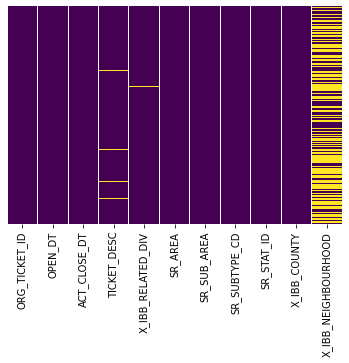

In [ ]:
sns.heatmap(df_lokasyon.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df_lokasyon["X_IBB_NEIGHBOURHOOD"].isna().sum()/df_lokasyon["X_IBB_NEIGHBOURHOOD"].shape[0]

0.4959531875328999

In [ ]:
df_lokasyon.isna().sum()

ORG_TICKET_ID                0
OPEN_DT                      0
ACT_CLOSE_DT                 0
TICKET_DESC              48493
X_IBB_RELATED_DIV          452
SR_AREA                      1
SR_SUB_AREA                  1
SR_SUBTYPE_CD                0
SR_STAT_ID                   0
X_IBB_COUNTY                 0
X_IBB_NEIGHBOURHOOD    1475428
dtype: int64

## ARRANGEMENT OF COLUMN NAMES











In [ ]:
df_lokasyon = df_lokasyon.rename(columns={'ORG_TICKET_ID': 'BASVURU_KODU', 'OPEN_DT': 'ACILIS_TARIHI', 'ACT_CLOSE_DT': 'KAPANIS_TARIHI', 'TICKET_DESC': 'BASVURU_TANIMI','X_IBB_RELATED_DIV': 'ILGILI_BIRIM', 'SR_AREA': 'KONU', 'SR_SUB_AREA': 'ALT_KONU', 'SR_SUBTYPE_CD': 'KANAL','SR_STAT_ID': 'DURUM', 'X_IBB_COUNTY': 'ILCE', 'X_IBB_NEIGHBOURHOOD': 'MAHALLE'})

In [ ]:
df_lokasyon.head()

## EXAMINATION OF EACH COLUMN

İLÇE BAZINDA İNCELEME YAPTIĞIMIZDA BURADA İSTANBUL'DA YER ALMAYAN İLÇELERDEN DE ÇEŞİTLİ ÇAĞRILARIN GELDİĞİNİ TESPİT ETTİK.** İSTANBUL'DA 39 ADET İLÇE** BULUNMASINA RAĞMEN İLÇE SAYISI BAZINDA İNCELENDİĞİNDE **769 FARKLI İLÇEDEN ** GELEN ÇAĞRILAR MEVCUT. YAPACAĞIMIZ ÇALIŞMA İSTANBUL'U KAPSADIĞI İÇİN İSTANBUL DIŞI İLÇE VERİLERİNİ DF_LOKASYON VERİSİNDEN ATTIK.

In [ ]:
df_lokasyon['ILCE'].unique().shape

In [ ]:
df_lokasyon['ILCE'].value_counts()[:]

ESENYURT        175878
BAHÇELİEVLER    148349
FATİH           146438
KÜÇÜKÇEKMECE    137428
BAĞCILAR        134175
                 ...  
SULTANHANI           1
BOZDOĞAN             1
BEŞİKDÜZÜ            1
GÜLAĞAÇ              1
PINARBAŞI            1
Name: ILCE, Length: 769, dtype: int64

İSTANBUL'DA 39 İLÇE YER ALIYOR, BİZ İLK 40 İLÇEYE BAKTIK VE 40. İLÇEDEN GELEN ÇAĞRI SAYISINI BAZ ALARAK İSTANBUL'DA OLMAYAN İLÇELERİ DÜŞÜRDÜK







In [ ]:
df_lokasyon['ILCE'].value_counts()[:50]

ESENYURT         175878
BAHÇELİEVLER     148349
FATİH            146438
KÜÇÜKÇEKMECE     137428
BAĞCILAR         134175
PENDİK           123397
ÜMRANİYE         117917
SULTANGAZİ       108664
ÜSKÜDAR           97933
BAŞAKŞEHİR        94004
ESENLER           91543
SANCAKTEPE        91192
KADIKÖY           90203
GAZİOSMANPAŞA     87312
ARNAVUTKÖY        83757
AVCILAR           82936
EYÜPSULTAN        81432
SULTANBEYLİ       80875
KARTAL            80218
KAĞITHANE         78584
MALTEPE           75489
BEYOĞLU           68176
ATAŞEHİR          64705
SARIYER           63126
ŞİŞLİ             60626
BEYKOZ            56585
ZEYTİNBURNU       49138
BAYRAMPAŞA        47459
BEYLİKDÜZÜ        46838
ÇEKMEKÖY          46689
BAKIRKÖY          44194
GÜNGÖREN          44127
BÜYÜKÇEKMECE      41070
BEŞİKTAŞ          37222
TUZLA             35920
SİLİVRİ           24562
ÇATALCA            9083
ŞİLE               8334
ADALAR             6880
GEBZE              1298
MERKEZ             1016
DARICA          

In [ ]:
counts = df_lokasyon['ILCE'].value_counts()
df_loc = df_lokasyon[~df_lokasyon['ILCE'].isin(counts[counts < 2345].index)]

In [ ]:
df_loc['BASVURU_KODU'].describe()

In [ ]:
df_loc['ACILIS_TARIHI'].describe()

In [ ]:
df_loc['KAPANIS_TARIHI'].describe()

In [ ]:
df_loc['BASVURU_TANIMI'].describe()

In [ ]:
df_loc['ILGILI_BIRIM'].describe()

In [ ]:
df_loc['KONU'].describe()

In [ ]:
df_loc['KONU'].value_counts().head(10)

In [ ]:
df_loc['ALT_KONU'].describe()

In [ ]:
df_loc['ALT_KONU'].value_counts().head(10)

In [ ]:
df_loc['KANAL'].describe()

In [ ]:
df_loc['DURUM'].describe()

In [ ]:
df_loc['ILCE'].describe()

In [ ]:
df_loc['MAHALLE'].describe()

335 TANE EŞSİZ KONU DEĞERİ İÇERİSİNDEN ANOMALİYE SEBEP OLABİLECEK KONU BAŞLIKLARINI SEÇTİK.

In [ ]:
df_loc['KONU'].unique()  
#'YANGIN'  'DOĞALGAZ'  'DEPREM'   'DOĞAL AFETLER'   'AFETLER'  'KAZALAR & OLAYLAR' 'İski'  'ASANSÖRLER' 'ACİL MÜDAHALE' 'SAĞLIK HİZMETLERİ' 'EMNİYET' 'GÜVENLİK'  'GÜVENLİK VE EMNİYET'  'Arıza Başvuru' 'SU'  'DSİ'  'DERE'
#'SOKAK HAYVANLARI' 'BAKIM ONARIM' 'İLÇE VETERİNER' 'MAZGAL'  'GÜRÜLTÜ'
#'TALEP' 'OTOBÜSLER' 'İETT OTOBÜSLERİ' 'METROBÜS' 'MARMARAY'  'MİNİBÜS/DOLMUŞ' 'MİNİBÜS/DOLMUŞ/SERVİS/TAKSİ' 'ÇAĞRI MERKEZİ'  'EVDE BAKIM HİZMETİ' 'SOKAKTA KALANLAR' 'HAT VE GÜZERGAH'  'SEFER GECİKMESİ/İPTALİ'  
#'RAMAZAN AYI'

In [ ]:
df_loc['ILGILI_BIRIM'].unique()

In [ ]:
df_loc['ILGILI_BIRIM'].value_counts().head(10)

In [ ]:
df_loc['KANAL'].unique() 

In [ ]:
df_loc['KANAL'].value_counts().head(10)

In [ ]:
df_loc['ILCE'].unique()

In [ ]:
df_loc['ILCE'].value_counts().head(10)

In [ ]:
df_loc['ALT_KONU'].unique()

In [ ]:
df_loc['DURUM'].unique()

In [ ]:
df_loc['MAHALLE'].unique()

In [ ]:
df_loc['MAHALLE'].value_counts().head(10)

In [ ]:
df_loc

## HANDLING WITH MISSING VALUES







* MAHALLE SÜTUNUNUN YAKLAŞIK %50'LİK BİR KISMI EKSİK DEĞERLERDEN OLUŞUYORDU. BURADA SATIR BAZINDA BİR EKSİLTMEYE GİDİLDİĞİNDE 3 MİLYONLUK VERİNİN %50'LİK KISMINI KAYBETMEMEK İÇİN MAHALLE SÜTUNUNU DÜŞÜRDÜK. LOKASYON BAZINDA İHTİYACIMIZ OLAN VERİYİ İSE 'İLÇE' SÜTUNUNDAN SAĞLADIK.
* 450 ADET NAN DEĞERE SAHİP OLAN 'İLGİLİ BİRİM' SÜTUNUNDAKİ NAN DEĞERLERİ 
DÜŞÜRMEK YERİNE 'BİLİNMİYOR' DEĞERİNİ ATADIK. 
* BU SAYEDE VERİMİZDEKİ ZAMANSAL  DESENİ BOZMAMAYA ÇALIŞTIK. 

In [ ]:
df = df_loc.drop(columns='MAHALLE', axis=1)

In [ ]:
df.isna().sum()

BASVURU_KODU          0
ACILIS_TARIHI         0
KAPANIS_TARIHI        0
BASVURU_TANIMI    48353
ILGILI_BIRIM        452
KONU                  1
ALT_KONU              1
KANAL                 0
DURUM                 0
ILCE                  0
dtype: int64

In [ ]:
df.dropna(how = 'any', axis=0, subset=['BASVURU_TANIMI'],inplace=True)

In [ ]:
df.isna().sum()

BASVURU_KODU        0
ACILIS_TARIHI       0
KAPANIS_TARIHI      0
BASVURU_TANIMI      0
ILGILI_BIRIM      451
KONU                1
ALT_KONU            1
KANAL               0
DURUM               0
ILCE                0
dtype: int64

In [ ]:
df.dropna(how = 'any', axis=0, subset=['KONU'],inplace=True)
df.dropna(how = 'any', axis=0, subset=['ALT_KONU'],inplace=True)

In [ ]:
df['ILGILI_BIRIM'].fillna(value='BİLİNMİYOR', inplace=True)

In [ ]:
df.isna().sum()

BASVURU_KODU      0
ACILIS_TARIHI     0
KAPANIS_TARIHI    0
BASVURU_TANIMI    0
ILGILI_BIRIM      0
KONU              0
ALT_KONU          0
KANAL             0
DURUM             0
ILCE              0
dtype: int64

In [ ]:
df.to_csv('prepared_data.csv', index = False)


## DETAILED REVIEW OF "KONU" COLUMN




## DATA VISUALIZATION

In [ ]:
df.reset_index(level=0, inplace=True)
df.groupby('ILCE')['BASVURU_KODU'].apply(list)

ILCE
ADALAR           [1-21114617268, 1-24736922550, 1-24831162166, ...
ARNAVUTKÖY       [1-20937843546, 1-21001845122, 1-22462832134, ...
ATAŞEHİR         [1-25009692916, 1-27537789314, 1-27833849165, ...
AVCILAR          [1-20112651868, 1-20991775713, 1-24327186833, ...
BAHÇELİEVLER     [1-20098585545, 1-20592015192, 1-20612731256, ...
BAKIRKÖY         [1-19876485256, 1-21254144183, 1-24701405660, ...
BAYRAMPAŞA       [1-22378045849, 1-24797932641, 1-24821482991, ...
BAĞCILAR         [1-24546042734, 1-24764712616, 1-24820802809, ...
BAŞAKŞEHİR       [1-21686131094, 1-22144887151, 1-24754267573, ...
BEYKOZ           [1-24754023813, 1-25402751749, 1-25414045184, ...
BEYLİKDÜZÜ       [1-24003930834, 1-24816132443, 1-25087359115, ...
BEYOĞLU          [1-19650525865, 1-19969673575, 1-20098410511, ...
BEŞİKTAŞ         [1-15193192054, 1-23006511819, 1-25055446384, ...
BÜYÜKÇEKMECE     [1-25489287324, 1-26440556194, 1-27193021870, ...
ESENLER          [1-18529314236, 1-24792470309, 1-2535653

In [ ]:
df_deneme = df.groupby('ILCE')['BASVURU_KODU'].count().head()

In [ ]:
df_deneme = df_deneme.rename_axis('ILCE').to_frame('Başvuru_sayısı')

In [ ]:
df_deneme

,Başvuru_sayısı
ILCE,
ADALAR,6683
ARNAVUTKÖY,82298
ATAŞEHİR,63704
AVCILAR,81463
BAHÇELİEVLER,145786


In [ ]:
df_deneme.reset_index(inplace=True)

In [ ]:
df_deneme.head()

,ILCE,Başvuru_sayısı
0,ADALAR,6683
1,ARNAVUTKÖY,82298
2,ATAŞEHİR,63704
3,AVCILAR,81463
4,BAHÇELİEVLER,145786


In [ ]:
df_deneme = df.groupby('ILCE')['BASVURU_KODU'].count()

In [ ]:
df_deneme = df_deneme.rename_axis('ILCE').to_frame('Başvuru_sayısı')

In [ ]:
df_deneme.reset_index(inplace=True)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df_deneme

,ILCE,Başvuru_sayısı
0,ADALAR,6683
1,ARNAVUTKÖY,82298
2,ATAŞEHİR,63704
3,AVCILAR,81463
4,BAHÇELİEVLER,145786
5,BAKIRKÖY,43610
6,BAYRAMPAŞA,46741
7,BAĞCILAR,131723
8,BAŞAKŞEHİR,92601
9,BEYKOZ,55642


In [ ]:
df_deneme2 = df_deneme.sort_values(by = ['Başvuru_sayısı'], ascending=False)

In [ ]:
x = df_deneme2['ILCE']

In [ ]:
y = df_deneme2['Başvuru_sayısı']

In [ ]:
df["ILCE"].value_counts()

ESENYURT         172169
BAHÇELİEVLER     145786
FATİH            144582
KÜÇÜKÇEKMECE     135371
BAĞCILAR         131723
PENDİK           121648
ÜMRANİYE         116276
SULTANGAZİ       106698
ÜSKÜDAR           96634
BAŞAKŞEHİR        92601
ESENLER           89655
SANCAKTEPE        89515
KADIKÖY           89206
GAZİOSMANPAŞA     85843
ARNAVUTKÖY        82298
AVCILAR           81463
EYÜPSULTAN        80316
SULTANBEYLİ       79523
KARTAL            78428
KAĞITHANE         77334
MALTEPE           74493
BEYOĞLU           66687
ATAŞEHİR          63704
SARIYER           62302
ŞİŞLİ             59778
BEYKOZ            55642
ZEYTİNBURNU       48330
BAYRAMPAŞA        46741
ÇEKMEKÖY          45943
BEYLİKDÜZÜ        45934
BAKIRKÖY          43610
GÜNGÖREN          43422
BÜYÜKÇEKMECE      40374
BEŞİKTAŞ          36471
TUZLA             35387
SİLİVRİ           24259
ÇATALCA            8994
ŞİLE               8281
ADALAR             6683
Name: ILCE, dtype: int64